<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Semanal 1
#### Por Jorge Andres Niño - revisión 1
# Análisis de filtros Activos



Se analiza el circuito presentado en a continuación, obteniendo la respuesta en frecuencia, fase y diagrama de polos y ceros.
A su vez se analiza funcionalidad y posibles aplicaciones.

![*Figura 1*](Circuito.png)

## Analísis del función transferencia.

Se presenta el análisis de la función transferencia realizado para el circuito propuesto. Se obtiene la respuesta en frecuencia, para modulo y fase y el diagrama de polos y ceros.

In [1]:
from IPython.display import IFrame, display
IFrame("./res_ts1.pdf", width=1000, height=1000)

### Respuesta en frecuencia, fase y diagrama de polos y ceros con Python.

Analizamos la respuesta en frecuencia, así como la fase y los diagramas en el plano complejo, mediante python.

In [2]:
# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

from scipy import signal as Funcion
import numpy as np
import matplotlib.pyplot as plt


# las librerías que usarremos las cargamos solo una vez.

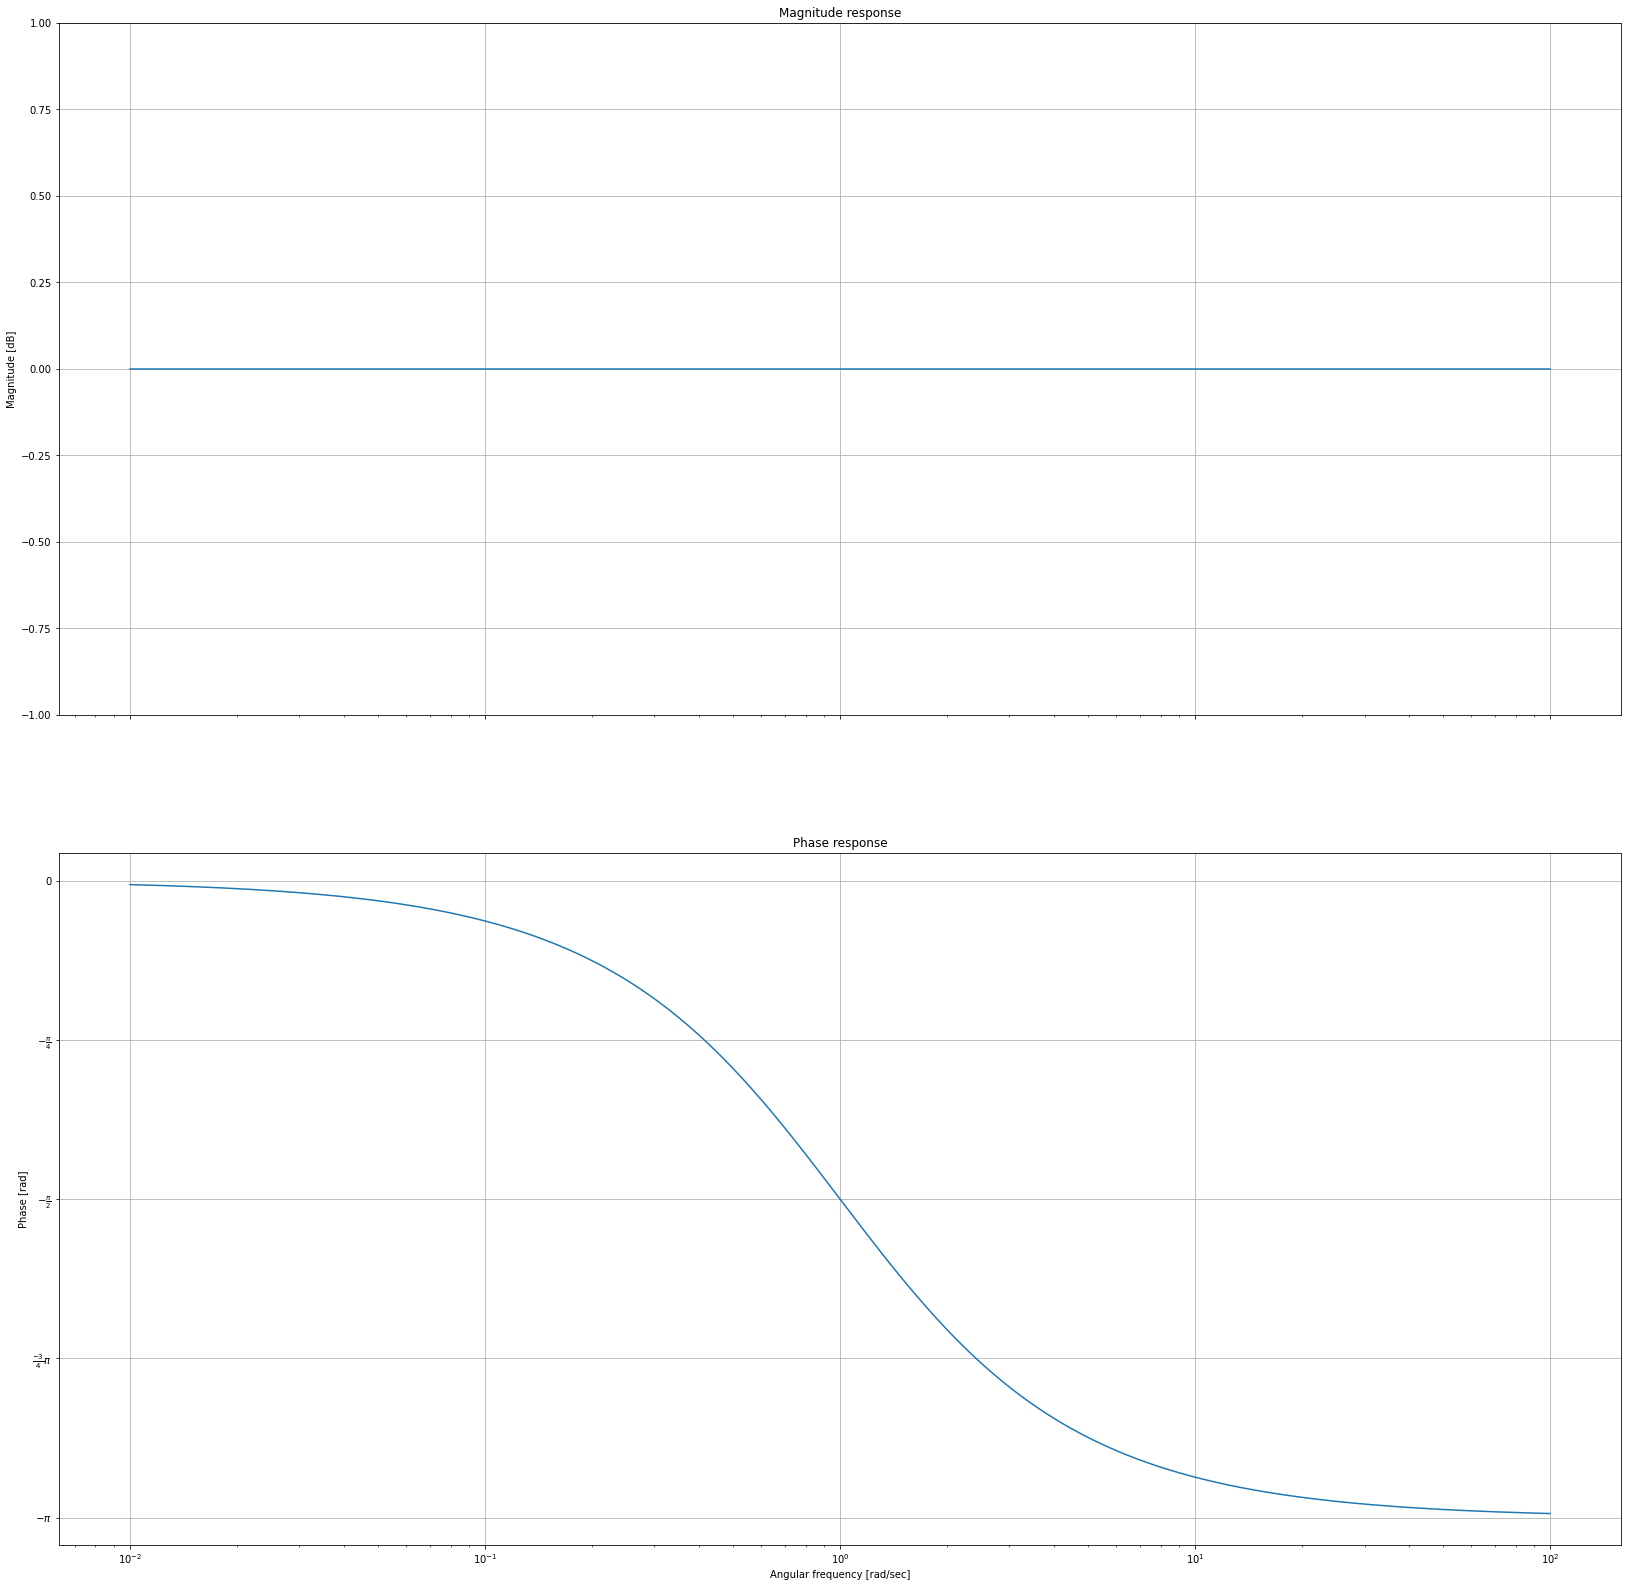

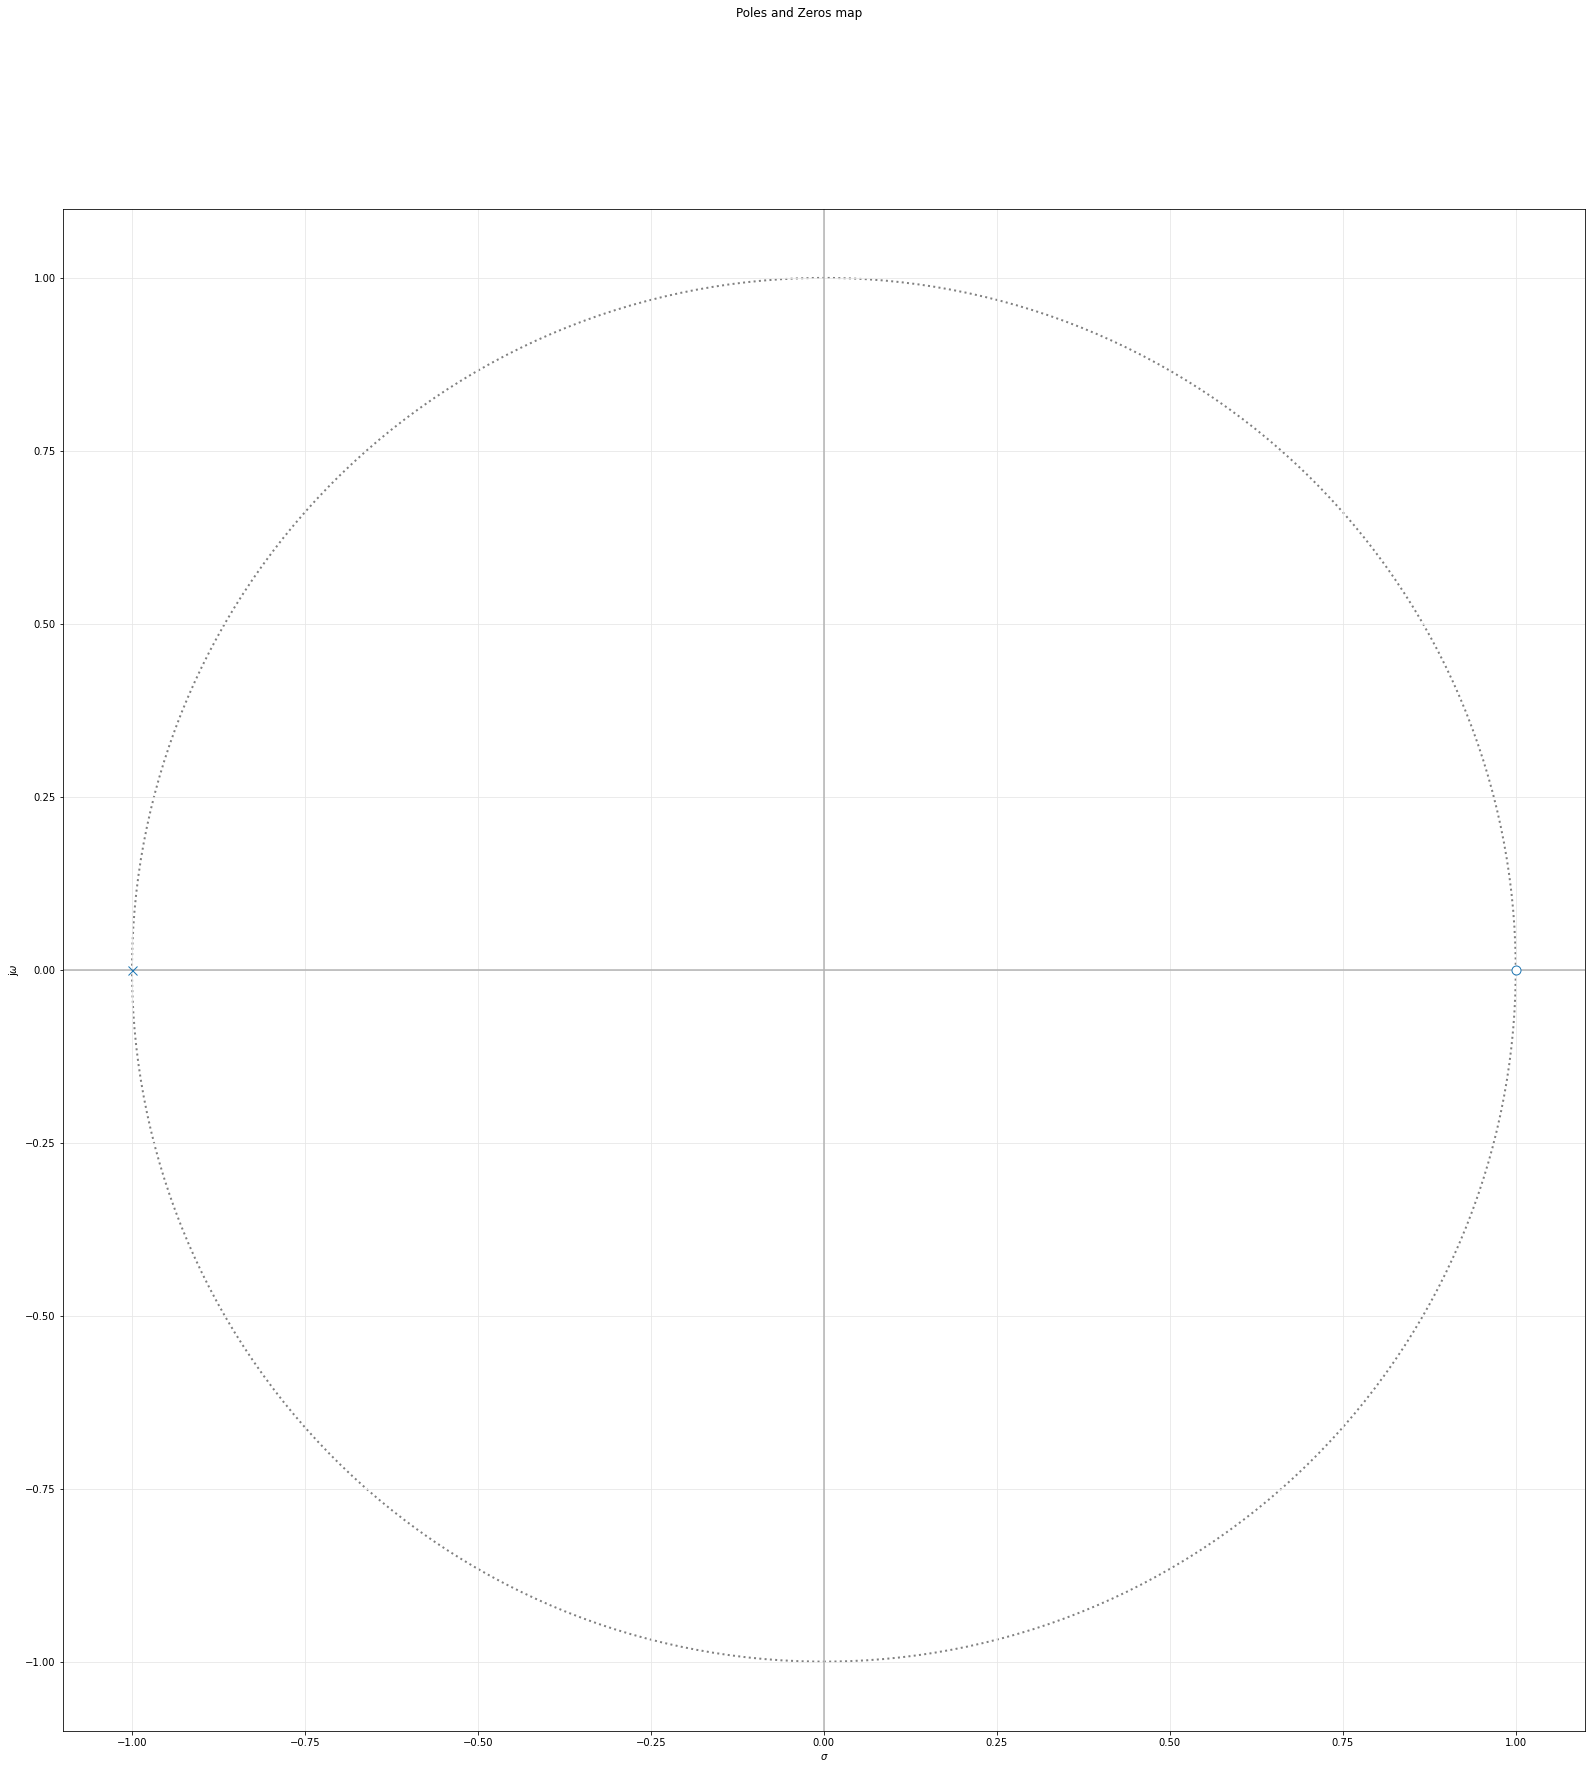

In [5]:
#%% Funcion transferencia:

w0 = 1

num = np.array([ -1., w0 ])
den = np.array([ 1., w0 ])

H1 = Funcion.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H1)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
plt.ylim([-1,1])
plt.gca
pzmap(H1)
plt.rcParams['figure.figsize'] = (28,28)
plt.show()


Aanalizamos el caso donde se hace valer: $$ R3=1K \Omega, C1=1\mu F, k = \frac{R2}{R1} =1$$ 
Se simula tanto la respuesta en frecuencia en python (donde se calcula $f_0 = 159.2Hz$  o también   $\omega _0 = 1Ks^{-1}$)
y ademas se simula en LTSpice.

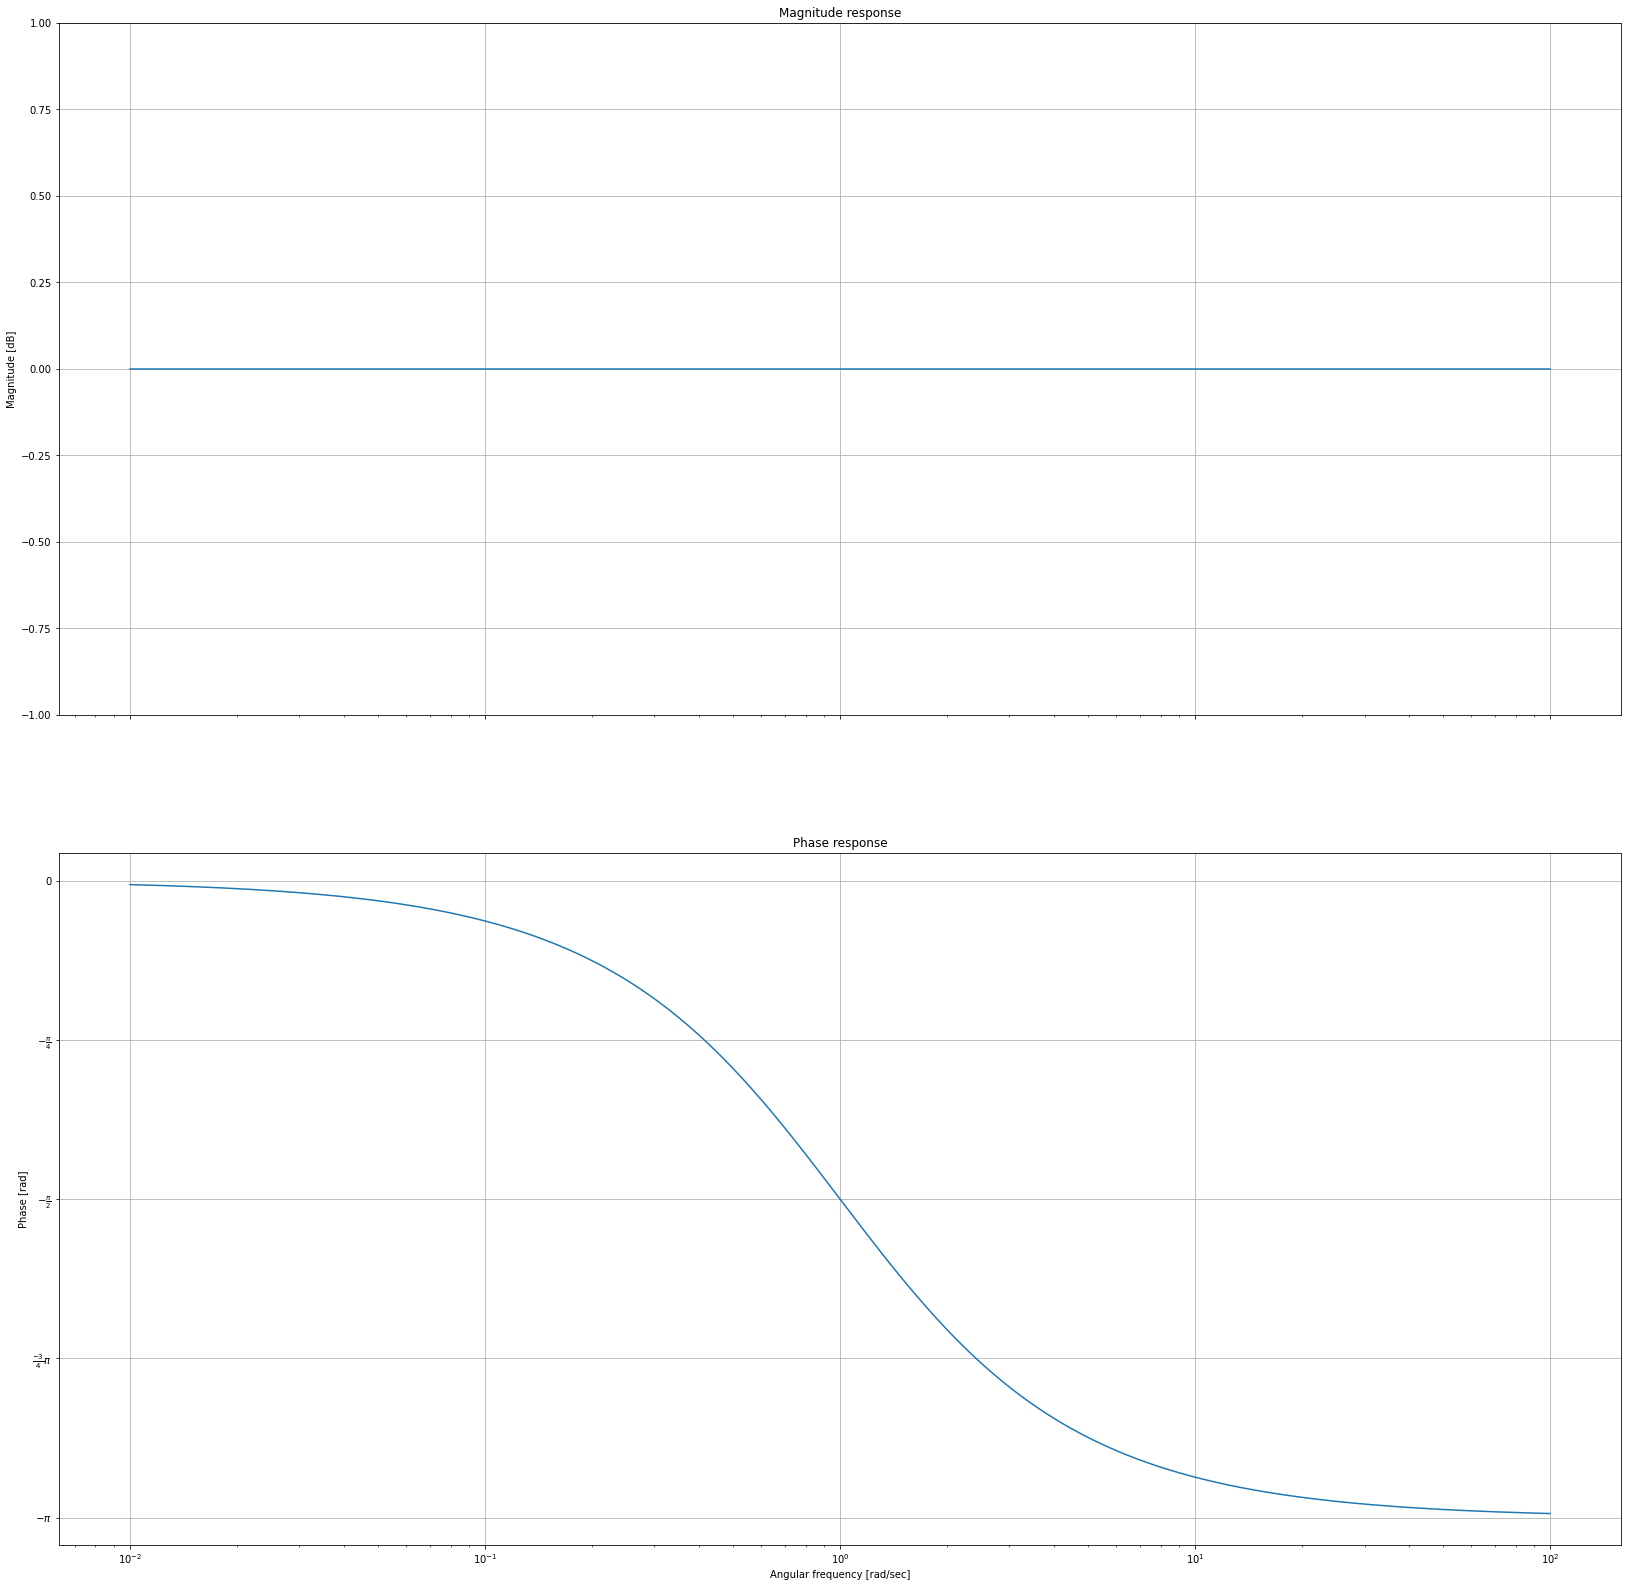

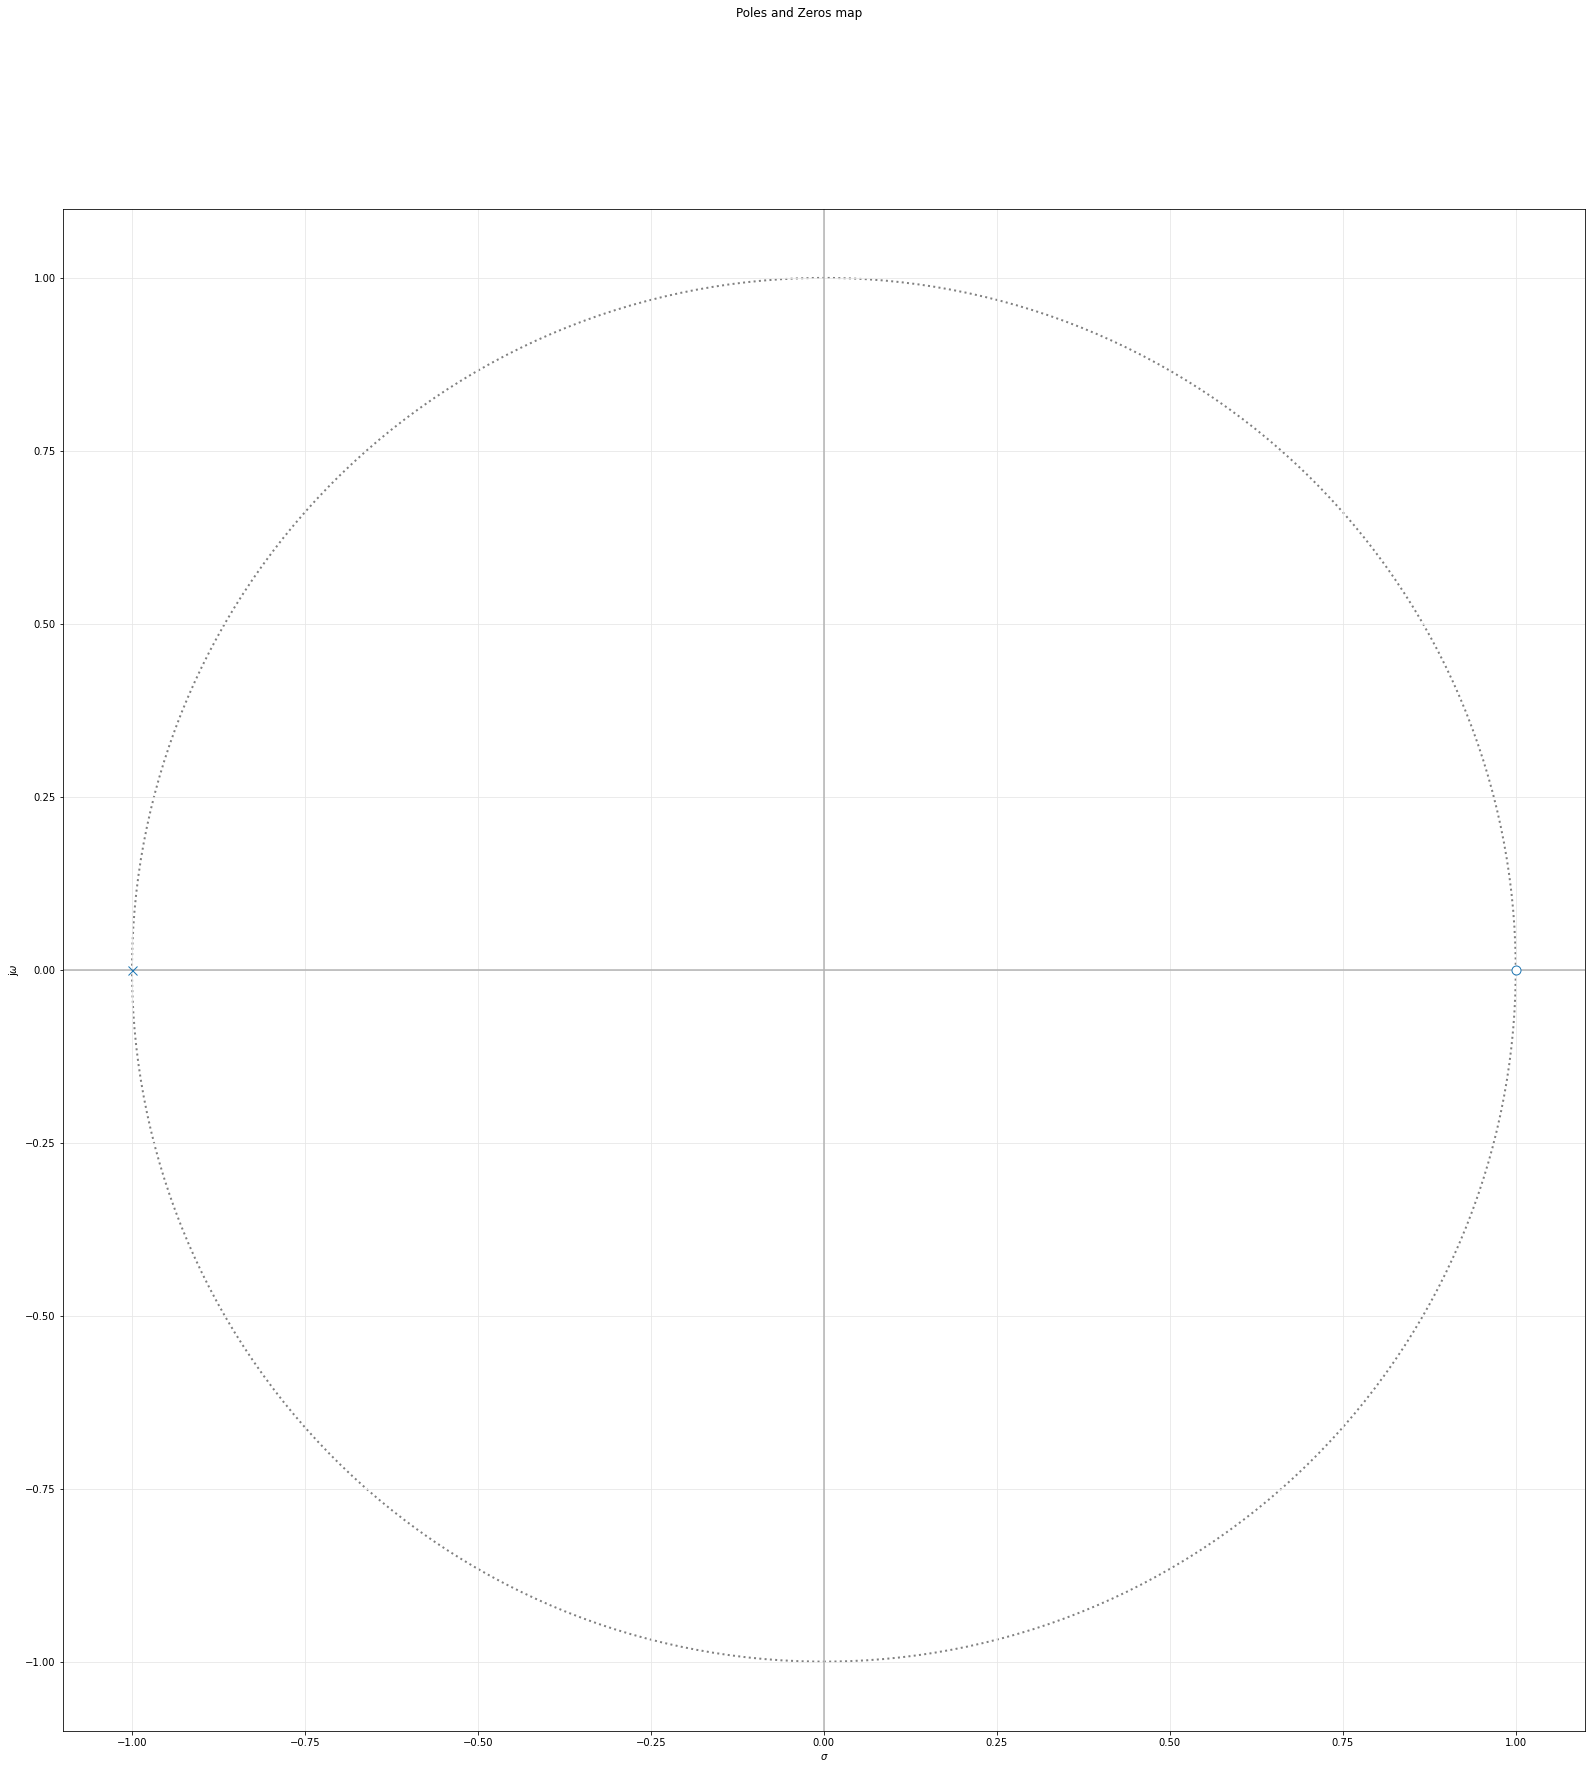

In [4]:
#%% Funcion trasnferencia para un caso particular:

R3= 1000
C1 = 1e-6
k = 1
w = 1/(R3*C1)  #w0 será 1Kr/s, es decir 159.2 Hz

num = np.array([ -k/(R3*C1), w ])
den = np.array([ k/(R3*C1), w ])

H1 = Funcion.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H1)
plt.sca(axes_hdl[0])
plt.ylim([-1,1])

plt.gca

pzmap(H1)
plt.rcParams['figure.figsize'] = (28,28)
plt.show()

### Respuesta en frecuencia y fase en LTSPICE

Por último se realiza una simulación en LTSPICE del circuito analizado, obteniendo su respuesta en frecuencia y su fase en el graficador del programa. Vemos que la frecuencia donde la fase alcanza el ángulo $\frac{\pi}{2}$ de desfasaje es de aproximadamente $f_0=159.2Hz$ como habiamos calculado

![*Figura 4*](CircuitoLTSPICE.png)

![*Figura 5*](TS1_LTSPICE_1.png)

Podemos observar en el gráfico el cursor ubicado en la posición tal que se alcanza el angulo de $\frac{\pi}{2}$ a la frecuencia de $160Hz$, mientras que el modulo permanece constante para todas las frecuencias.

# Conclusiones:
 * Se analizo y simulo el funcionamiento de un circuito rotador de fase conocido como "pasa-todo" lo cual hace referencia solo a la respuesta del módulo de la transferencia, sin embargo su utilidad se encuentra precisamente en la respuesta de la fase.
 * Nos permite, sin atenuar la señal o sin cambiar su forma, obtener en función de la frecuencia
 un cambio de fase, o un desplazamiento de fase. Este efecto puede emplearse en música directamente para reverberación sin cambiar la señal.